(320, 26)
                Q           K          IM       col_1       col_2       col_3  \
count  320.000000  320.000000  320.000000  320.000000  320.000000  320.000000   
mean     0.348899    0.035438    1.008940    0.940625    0.634375    0.384375   
std      0.140052    0.014774    0.298734    0.236695    0.482359    0.487209   
min      0.100046    0.010008    0.505721    0.000000    0.000000    0.000000   
25%      0.225888    0.023349    0.752285    1.000000    0.000000    0.000000   
50%      0.353303    0.035735    1.017470    1.000000    1.000000    0.000000   
75%      0.471947    0.048805    1.254215    1.000000    1.000000    1.000000   
max      0.599169    0.059947    1.558296    1.000000    1.000000    1.000000   

            col_4       col_0       hin_1       hin_2  ...       abu_1  \
count  320.000000  320.000000  320.000000  320.000000  ...  320.000000   
mean     0.253125    2.215625    0.756250    0.478125  ...    0.981250   
std      0.435483    1.281802    0.430

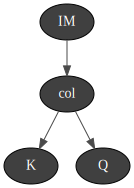

In [242]:
# -*- coding: utf-8 -*-
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

#Stacking
#pip install six
#reading in CSV's from a file path
df = pd.read_excel('model.xlsx')
print(df.shape)
df.head(5)
print(df.describe())
print(df.info())

#pip install pyAgrum

import pandas
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.bn2roc import showROC


IM_labels =['0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1.0','1.0-1.1','1.1-1.2','1.2-1.3','1.3-1.4','1.4-1.5','1.5-1.6']
K_labels = ['0.01-0.02','0.02-0.03','0.03-0.04','0.04-0.05','0.05-0.06']
Q_labels = ['0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6']
col_labels = ['ND','SD','ED']

df['K'] = pd.cut(df['K'], [.01,.02,.03,.04,.05,.06], labels = K_labels )
df['Q'] = pd.cut(df['Q'], [.1,.2,.3,.4,.5,.6],labels = Q_labels)
df['IM'] = pd.cut(df['IM'],list(np.arange(0.5,1.65,0.1)), labels = IM_labels );
df['col_0'] = pd.cut(df['col_0'],[-0.1,1.1,3.1,4.1], labels = col_labels ); #damage 0+1, damage2+3, damage 4

bn = gum.BayesNet("Column_1")
bn =gum.fastBN("IM{0.5-0.6|0.6-0.7|0.7-0.8|0.8-0.9|0.9-1.0|1.0-1.1|1.1-1.2|1.2-1.3|1.3-1.4|1.4-1.5|1.5-1.6}->col{ND|SD|ED}->K{0.01-0.02|0.02-0.03|0.03-0.04|0.04-0.05|0.05-0.06};Q{0.1-0.2|0.2-0.3|0.3-0.4|0.4-0.5|0.5-0.6}<-col{ND|SD|ED}")
print(bn.variable("IM"))
print(bn.variable("K"))
print(bn.variable("Q"))
print(bn.variable("col"))
#%%
gnb.showBN(bn)

In [244]:
bn.cpt('IM')[:] = list(df['IM'].value_counts()[IM_labels]+1)
bn.cpt('IM').normalizeAsCPT()
bn.cpt('IM')

(gum::Potential<double>@0x17eed35dc90) 
  IM                                                                                                         |
0.5-0.6  |0.6-0.7  |0.7-0.8  |0.8-0.9  |0.9-1.0  |1.0-1.1  |1.1-1.2  |1.2-1.3  |1.3-1.4  |1.4-1.5  |1.5-1.6  |
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.0937  | 0.0997  | 0.1057  | 0.1057  | 0.0816  | 0.1148  | 0.0937  | 0.1057  | 0.0604  | 0.0937  | 0.0453  |

In [245]:
for ii in range(len(IM_labels)):
    bn.cpt('col')[ii,:] = np.array(df[df['IM']==IM_labels[ii]]['col_0'].value_counts()[col_labels])+1
bn.cpt('col').normalizeAsCPT()
bn.cpt('col')

(gum::Potential<double>@0x17eed35dc10) 
      ||  col                        |
IM    ||ND       |SD       |ED       |
------||---------|---------|---------|
0.5-0.|| 0.6061  | 0.2727  | 0.1212  |
0.6-0.|| 0.5143  | 0.3714  | 0.1143  |
0.7-0.|| 0.5135  | 0.3514  | 0.1351  |
0.8-0.|| 0.5946  | 0.2432  | 0.1622  |
0.9-1.|| 0.4138  | 0.4483  | 0.1379  |
1.0-1.|| 0.2750  | 0.4250  | 0.3000  |
1.1-1.|| 0.2424  | 0.5455  | 0.2121  |
1.2-1.|| 0.1892  | 0.4054  | 0.4054  |
1.3-1.|| 0.1818  | 0.3636  | 0.4545  |
1.4-1.|| 0.1212  | 0.3333  | 0.5455  |
1.5-1.|| 0.1176  | 0.4706  | 0.4118  |

In [246]:
bn.cpt('K')[0,:] = list(df[df['col_0']==col_labels[0]]['K'].value_counts()[K_labels]+1)
bn.cpt('K')[1,:] = list(df[df['col_0']==col_labels[1]]['K'].value_counts()[K_labels]+1)
bn.cpt('K')[2,:] = list(df[df['col_0']==col_labels[2]]['K'].value_counts()[K_labels]+1)
bn.cpt('K').normalizeAsCPT()
bn.cpt('K')

(gum::Potential<double>@0x17eed35d990) 
      ||  K                                              |
col   ||0.01-0.02|0.02-0.03|0.03-0.04|0.04-0.05|0.05-0.06|
------||---------|---------|---------|---------|---------|
ND    || 0.2562  | 0.2231  | 0.1570  | 0.1405  | 0.2231  |
SD    || 0.1719  | 0.2109  | 0.1797  | 0.2344  | 0.2031  |
ED    || 0.1628  | 0.1512  | 0.2674  | 0.1744  | 0.2442  |

In [247]:
bn.cpt('Q')[0,:] = list(df[df['col_0']==col_labels[0]]['Q'].value_counts()[Q_labels]+1)
bn.cpt('Q')[1,:] = list(df[df['col_0']==col_labels[1]]['Q'].value_counts()[Q_labels]+1)
bn.cpt('Q')[2,:] = list(df[df['col_0']==col_labels[2]]['Q'].value_counts()[Q_labels]+1)
bn.cpt('Q').normalizeAsCPT()
bn.cpt('Q')

(gum::Potential<double>@0x17eed2b0430) 
      ||  Q                                              |
col   ||0.1-0.2  |0.2-0.3  |0.3-0.4  |0.4-0.5  |0.5-0.6  |
------||---------|---------|---------|---------|---------|
ND    || 0.3140  | 0.3306  | 0.1736  | 0.1074  | 0.0744  |
SD    || 0.1016  | 0.1875  | 0.2188  | 0.3047  | 0.1875  |
ED    || 0.1047  | 0.1395  | 0.1512  | 0.2791  | 0.3256  |

In [248]:
ie=gum.LazyPropagation(bn)
ie.addTarget('col')
ie.setEvidence({'IM':IM_labels[0],'K':K_labels[2], 'Q':Q_labels[2]})
ie.chgEvidence('IM',IM_labels[1])
ie.makeInference()
gnb.showInformation(bn,{},size="20")

Text(0, 0.5, 'P')

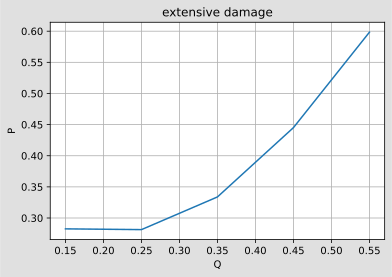

In [268]:
P = np.zeros([len(Q_labels),1])
for ii in range(len(Q_labels)):
    ie.setEvidence({'IM':IM_labels[5],'K':K_labels[2], 'Q':Q_labels[ii]})
    P[ii] = ie.posterior('col').toarray()[2]
plt.plot(np.arange(0.15,0.6,0.1),P)
plt.title('extensive damage')
plt.grid()
plt.xlabel('Q')
plt.ylabel('P')

Text(0, 0.5, 'P')

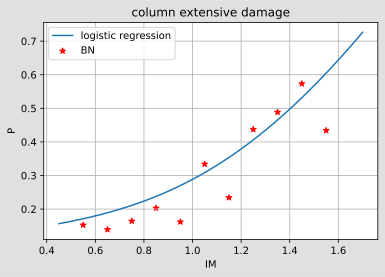

In [267]:
P = np.zeros([len(IM_labels),1])
for ii in range(len(IM_labels)):
    ie.setEvidence({'IM':IM_labels[ii],'K':K_labels[2], 'Q':Q_labels[2]})
    P[ii] = ie.posterior('col').toarray()[2]
    
real = pd.read_excel('logistic.xlsx')
plt.plot(real['IM'],real['P'], label = 'logistic regression')
plt.scatter(np.arange(0.55,1.65,0.1),P, marker = '*', color = 'red', label = 'BN')
plt.title('column extensive damage')
plt.grid()
plt.legend()
plt.xlabel('IM')
plt.ylabel('P')

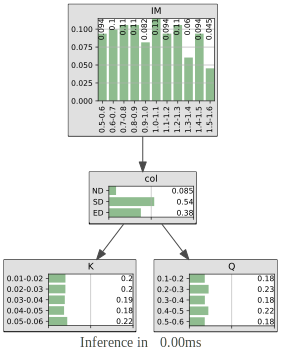

In [32]:
gnb.showInference(bn)
#gnb.showPosterior(bn,evs={"IM": IM_labels[1],"K": K_labels[3], "Q": Q_labels[3]},target='col')

next construct the Bayes Network for predicting fragility of bridge structure

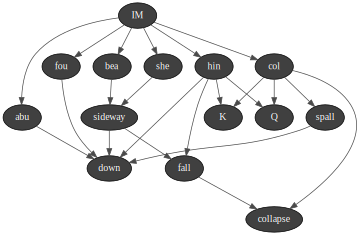

In [269]:
bridge = gum.BayesNet()
bridge.add(gum.LabelizedVariable('IM','seismic_intensity',IM_labels))
bridge.add(gum.LabelizedVariable('Q','strength_ratio', Q_labels))
bridge.add(gum.LabelizedVariable('K','stiffness_ratio', K_labels))
bridge.add(gum.LabelizedVariable('col','Column_damage_level',['ND','SD','ED']))
bridge.add(gum.LabelizedVariable('abu','Abutment_damage',2))
bridge.add(gum.LabelizedVariable('fou','Foundation_damage',2))
bridge.add(gum.LabelizedVariable('hin','Hinge_opening',2))
bridge.add(gum.LabelizedVariable('bea','Bearing_damage',2))
bridge.add(gum.LabelizedVariable('she','ShearKey_damage',2))
bridge.add(gum.LabelizedVariable('spall','spalling_of_cover',2))
bridge.add(gum.LabelizedVariable('collapse','complete_collapse',2))
bridge.addNoisyOR(gum.LabelizedVariable('fall','unseating',2),0.2)
bridge.addNoisyOR(gum.LabelizedVariable('sideway','large_sideway',2),0.2)
bridge.addNoisyOR(gum.LabelizedVariable('down','shutdown_for_retrofitting',2),0.2)


bridge.addArc('IM','abu')
bridge.addArc('IM','col')
bridge.addArc('IM','fou')
bridge.addArc('IM','hin')
bridge.addArc('IM','bea')
bridge.addArc('IM','she')
bridge.addArc('col','Q')
bridge.addArc('hin','Q')

bridge.addArc('col','K')
bridge.addArc('hin','K')

bridge.addWeightedArc('abu','down',0.8)
bridge.addWeightedArc('spall','down',0.8)
bridge.addWeightedArc('fou','down',0.8)
bridge.addWeightedArc('hin','down',0.8)
bridge.addWeightedArc('sideway','down',0.8)

bridge.addWeightedArc('hin','fall',0.5)
bridge.addWeightedArc('sideway','fall',0.2)

bridge.addWeightedArc('bea','sideway',0.5)
bridge.addWeightedArc('she','sideway',0.8)

bridge.addArc('col','spall')
bridge.addArc('col','collapse')
bridge.addArc('fall','collapse')


#bn.cpt('abu')[:]
gnb.showBN(bridge)

In [270]:
df = pd.read_excel('model.xlsx')
IM_labels =['0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1.0','1.0-1.1','1.1-1.2','1.2-1.3','1.3-1.4','1.4-1.5','1.5-1.6']
K_labels = ['0.01-0.02','0.02-0.03','0.03-0.04','0.04-0.05','0.05-0.06']
Q_labels = ['0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6']
col_labels = ['ND','SD','ED']
binary_labels = ['0','1']

df['K'] = pd.cut(df['K'], [.01,.02,.03,.04,.05,.06], labels = K_labels )
df['Q'] = pd.cut(df['Q'], [.1,.2,.3,.4,.5,.6],labels = Q_labels)
df['IM'] = pd.cut(df['IM'],list(np.arange(0.5,1.65,0.1)), labels = IM_labels );
df['abu_0'] = pd.cut(df['abu_0'],[-0.1,1.1,3.1], labels = binary_labels); # damage 0+1/ damage 2+3
df['col_0'] = pd.cut(df['col_0'],[-0.1,1.1,3.1,4.1], labels = col_labels ); #no damage 0+1, damage2+3, damage 4
df['fun_0'] = pd.cut(df['fun_0'],[-0.1,1.1,2.1], labels = binary_labels); # damage 0+1/ damage 2
df['hin_0'] = pd.cut(df['hin_0'],[-0.1,1.1,2.1], labels = binary_labels); # damage 0+1/ damage 2
df['bea_0'] = pd.cut(df['bea_0'],[-0.1,0.9,4.1], labels = binary_labels); # damage 0/ damage 1+2+3+4
df['she_0'] = pd.cut(df['she_0'],[-0.1,0.9,2.1], labels = binary_labels); # damage 0/ damage 1+2

In [271]:
bridge.cpt('IM')[:] = list(df['IM'].value_counts()[IM_labels]+1)
bridge.cpt('IM').normalizeAsCPT()

for ii in range(len(IM_labels)):
    bridge.cpt('col')[ii,:] = np.array(df[df['IM']==IM_labels[ii]]['col_0'].value_counts()[col_labels])+1
    bridge.cpt('abu')[ii,:] = np.array(df[df['IM']==IM_labels[ii]]['abu_0'].value_counts()[binary_labels])+1
    bridge.cpt('fou')[ii,:] = np.array(df[df['IM']==IM_labels[ii]]['fun_0'].value_counts()[binary_labels])+1
    bridge.cpt('hin')[ii,:] = np.array(df[df['IM']==IM_labels[ii]]['hin_0'].value_counts()[binary_labels])+1
    bridge.cpt('bea')[ii,:] = np.array(df[df['IM']==IM_labels[ii]]['bea_0'].value_counts()[binary_labels])+1
    bridge.cpt('she')[ii,:] = np.array(df[df['IM']==IM_labels[ii]]['she_0'].value_counts()[binary_labels])+1
bridge.cpt('col').normalizeAsCPT()
bridge.cpt('abu').normalizeAsCPT()
bridge.cpt('fou').normalizeAsCPT()
bridge.cpt('hin').normalizeAsCPT()
bridge.cpt('bea').normalizeAsCPT()
bridge.cpt('she').normalizeAsCPT()
for ii in range(len('col')):
    temp = df[df['hin_0']=='0']
    bridge.cpt('K')[0,ii,:] = np.array(temp[temp['col_0']==col_labels[ii]]['K'].value_counts()[K_labels])+1
    temp = df[df['hin_0']=='1']
    bridge.cpt('K')[1,ii,:] = np.array(temp[temp['col_0']==col_labels[ii]]['K'].value_counts()[K_labels])+1
bridge.cpt('K').normalizeAsCPT()
for ii in range(len('col')):
    temp = df[df['hin_0']=='0']
    bridge.cpt('Q')[0,ii,:] = np.array(temp[temp['col_0']==col_labels[ii]]['Q'].value_counts()[Q_labels])+1
    temp = df[df['hin_0']=='1']
    bridge.cpt('Q')[1,ii,:] = np.array(temp[temp['col_0']==col_labels[ii]]['Q'].value_counts()[Q_labels])+1
bridge.cpt('Q').normalizeAsCPT()
bridge.cpt('spall')[:] = [[0.99,0.01],[0.3,0.7],[0.01,0.99]]
bridge.cpt('collapse')[0,:,:] = [[0.99,0.01],[0.95,0.05],[0.8,0.2]]
bridge.cpt('collapse')[1,:,:] = [[0.90,0.10],[0.85,0.15],[0.7,0.3]]
gnb.showInformation(bridge,{},size="20")

In [280]:
bridge.cpt('fall')

(gum::Potential<double>@0x17eed2b04d0) 
             ||  fall             |
hin   |sidewa||0        |1        |
------|------||---------|---------|
0     |0     || 0.8000  | 0.2000  |
1     |0     || 0.5000  | 0.5000  |
0     |1     || 0.8000  | 0.2000  |
1     |1     || 0.5000  | 0.5000  |

In [281]:
bridge.cpt('collapse')

(gum::Potential<double>@0x17eed2b00d0) 
             ||  collapse         |
col   |fall  ||0        |1        |
------|------||---------|---------|
ND    |0     || 0.9900  | 0.0100  |
SD    |0     || 0.9500  | 0.0500  |
ED    |0     || 0.8000  | 0.2000  |
ND    |1     || 0.9000  | 0.1000  |
SD    |1     || 0.8500  | 0.1500  |
ED    |1     || 0.7000  | 0.3000  |

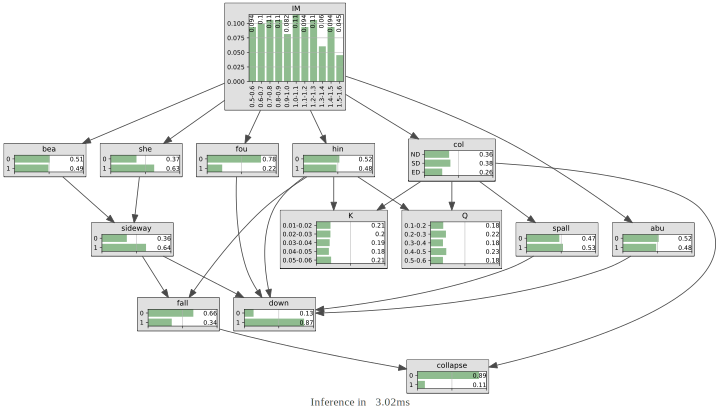

In [279]:
gnb.showInference(bridge, size = '10')

In [234]:
ctree=gum.LazyPropagation(bridge)
ctree.addTarget('fall')
ctree.addTarget('down')
ctree.addTarget('collapse')
ctree.setEvidence({'IM':IM_labels[5],'K':K_labels[3], 'Q':Q_labels[3]})
ctree.makeInference()

Text(0, 0.5, 'P')

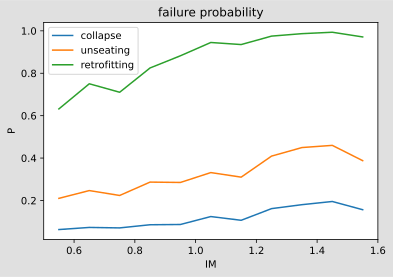

In [240]:
P1 = np.zeros([len(IM_labels),1])
P2 = P1.copy();
P3 = P1.copy();
for ii in range(len(IM_labels)):
    ctree.setEvidence({'IM':IM_labels[ii],'K':K_labels[2], 'Q':Q_labels[2]})
    P1[ii] = ctree.posterior('collapse').toarray()[1]
    P2[ii] = ctree.posterior('fall').toarray()[1]
    P3[ii] = ctree.posterior('down').toarray()[1]
plt.plot(np.arange(0.55,1.65,0.1),P1, label = 'collapse')
plt.plot(np.arange(0.55,1.65,0.1),P2, label = 'unseating')
plt.plot(np.arange(0.55,1.65,0.1),P3, label = 'retrofitting')
plt.legend()
plt.title('failure probability')
plt.xlabel('IM')
plt.ylabel('P')

In [202]:
from pyAgrum.lib import bn2graph
g = bn2graph.BNinference2dot(bridge,size = '50',
                    targets=['down', 'fall','collapse'],
                    evs={'IM': IM_labels[5],
                          'K': K_labels[3],
                          'Q': Q_labels[3]})
g.write("test.svg", format='svg')

True